<a href="https://colab.research.google.com/github/RifaldiAchmad/Business-Analysis-and-DataDriven-Modeling-in-E-Commerce/blob/main/02%20-%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [72]:
data_awal = pd.read_csv('https://raw.githubusercontent.com/RifaldiAchmad/Business-Analysis-and-DataDriven-Modeling-in-E-Commerce/refs/heads/main/modelling/e-commerce.csv')
data_awal.drop(['customer_id', 'customer_state', 'frequency'], axis=1, inplace=True)
data_awal

,review_score,price,payment_type,product_category,monetary,recency,RFM_score
0,5,49.00,credit_card,watches_gifts,49.00,201,2.76
1,5,78.00,boleto,watches_gifts,78.00,54,4.05
2,1,29.00,credit_card,watches_gifts,29.00,350,1.74
3,4,78.00,credit_card,watches_gifts,78.00,141,3.90
4,5,49.00,boleto,watches_gifts,94.00,15,4.43
...,...,...,...,...,...,...,...
2313,4,95.00,boleto,watches_gifts,95.00,387,3.88
2314,5,159.00,credit_card,watches_gifts,159.00,414,4.15
2315,3,95.00,credit_card,watches_gifts,95.00,244,4.10
2316,5,49.00,credit_card,watches_gifts,49.00,382,2.48


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [73]:
data_awal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_score      2318 non-null   int64  
 1   price             2318 non-null   float64
 2   payment_type      2318 non-null   object 
 3   product_category  2318 non-null   object 
 4   monetary          2318 non-null   float64
 5   recency           2318 non-null   int64  
 6   RFM_score         2318 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 126.9+ KB


*   Tipe data sudah benar semua

In [74]:
data_awal.describe()

,review_score,price,monetary,recency,RFM_score
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,3.943054,59.687571,145.137882,221.156169,3.458076
std,1.365852,33.728268,218.660952,152.500484,0.928344
min,1.000000,16.000000,19.000000,0.000000,1.450000
25%,3.000000,39.000000,49.000000,73.000000,2.660000
50%,5.000000,49.000000,69.000000,218.000000,3.550000
75%,5.000000,69.000000,117.000000,342.750000,4.257500
max,5.000000,249.000000,1192.000000,558.000000,4.950000


In [75]:
data_awal['payment_type'].value_counts()

,count
payment_type,
credit_card,1586
boleto,405
voucher,297
debit_card,30


Mayoritas customer menggunakan kartu kredit sebagai pembayaran

In [76]:
data_awal['product_category'].value_counts()

,count
product_category,
watches_gifts,1844
fashion_bags_accessories,399
audio,32
perfumery,16
sports_leisure,14
computers_accessories,12
construction_tools_safety,1


Mayoritas customer berbelanja produk berupa watches gifts

In [77]:
data_awal['review_score'].value_counts()

,count
review_score,
5,1174
4,494
1,269
3,263
2,118


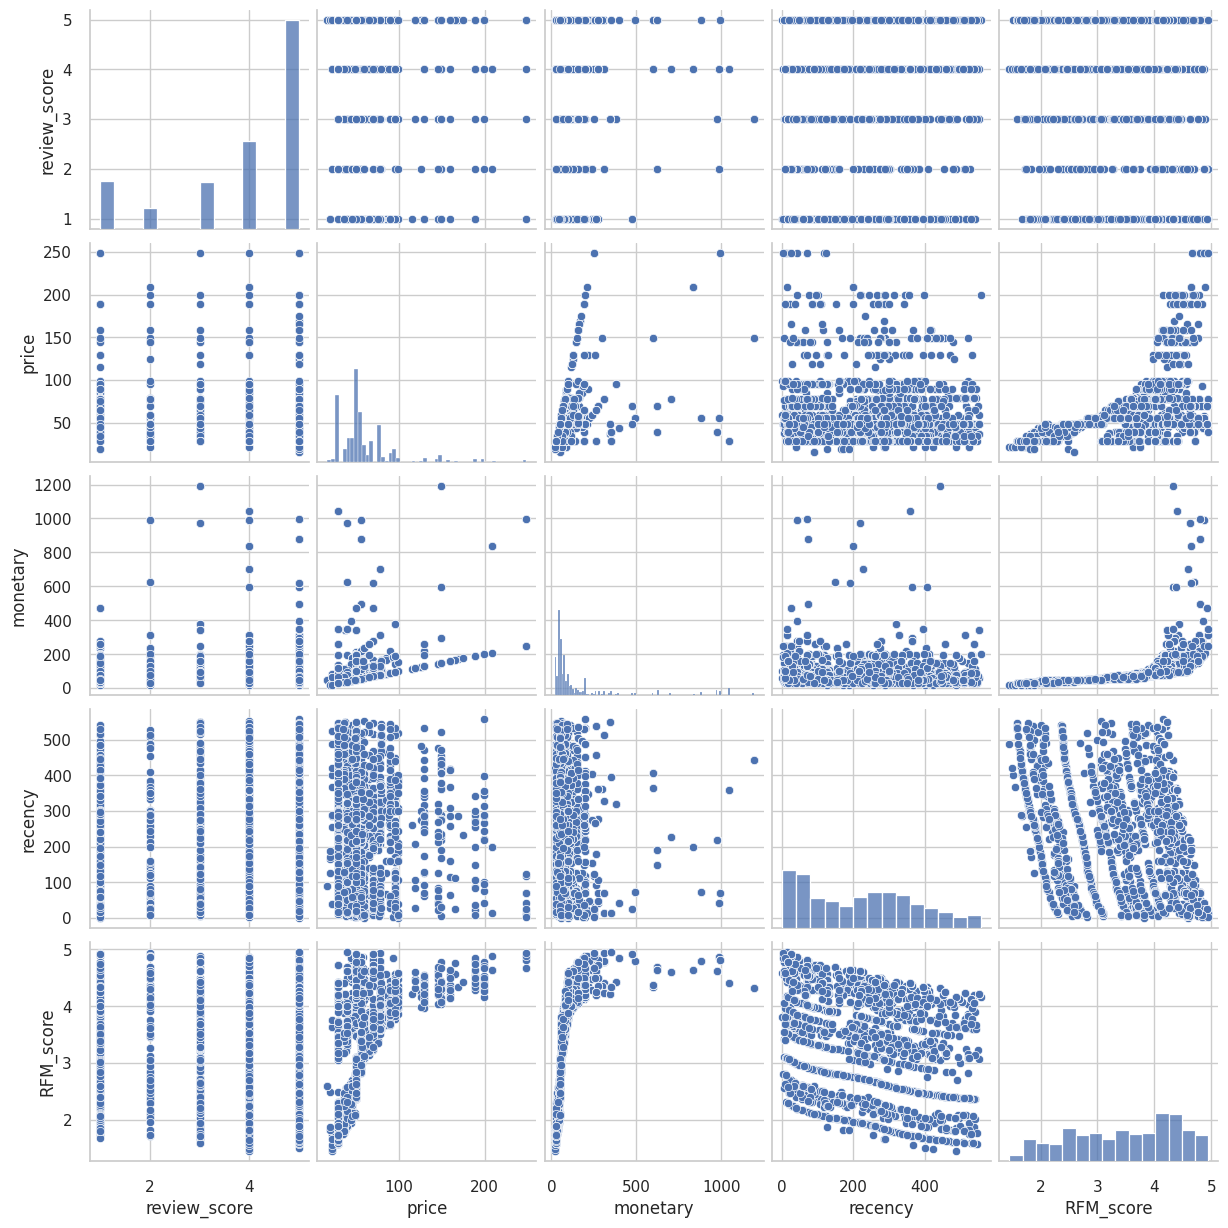

In [78]:
sns.pairplot(data_awal.select_dtypes(include=['int64', 'float64']))
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

###Deteksi dan Penanganan Outlier

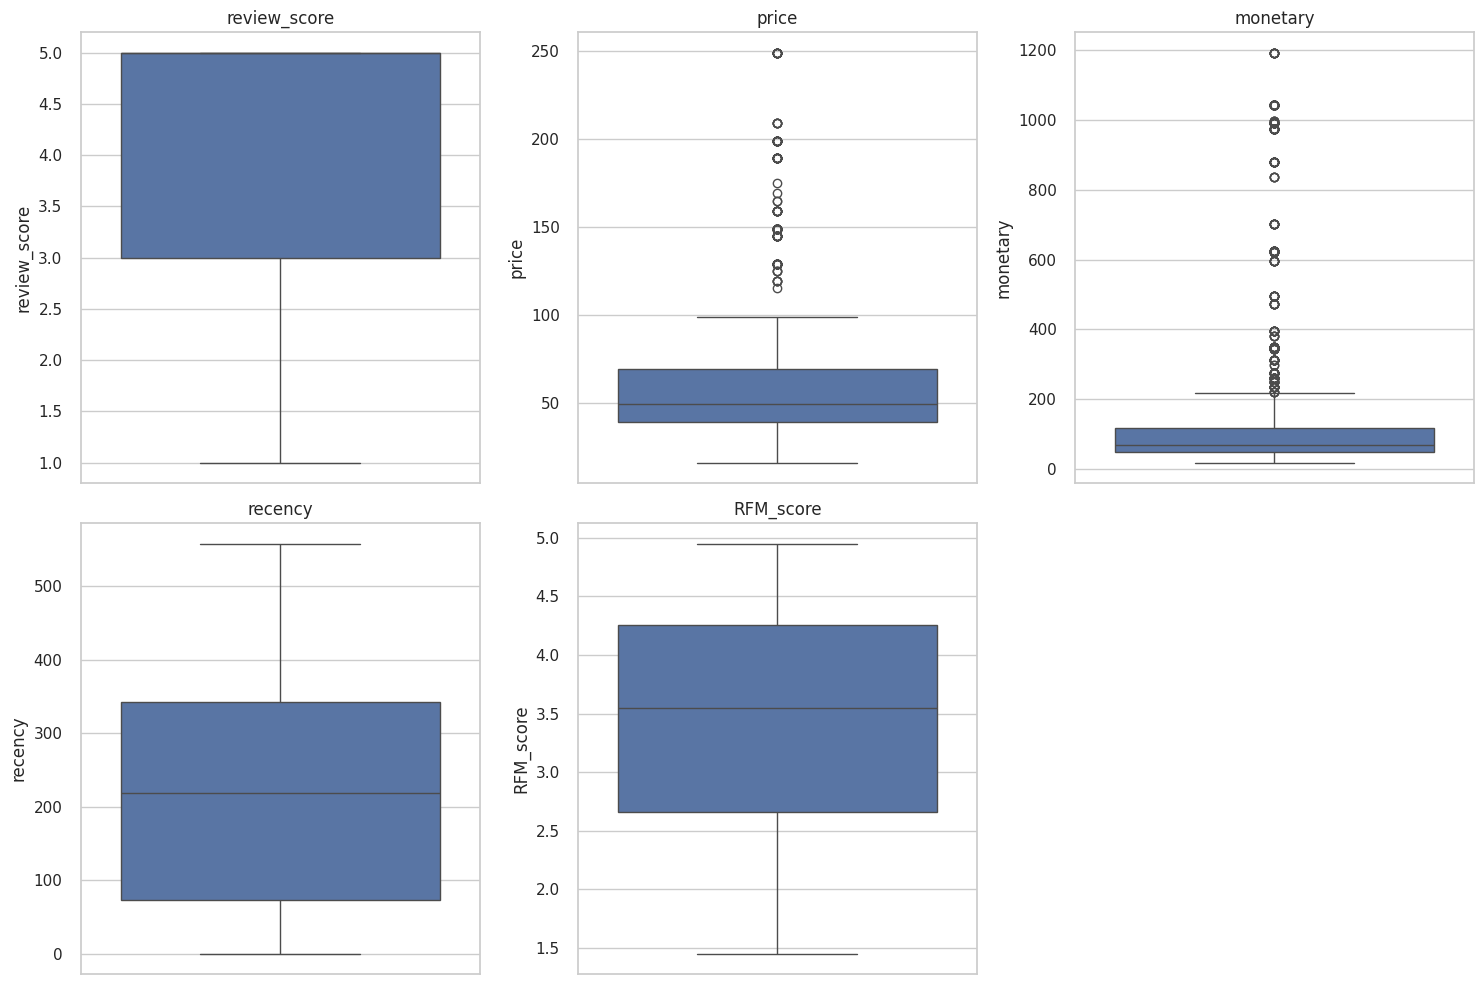

In [79]:
numerical_features = data_awal.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, len(numerical_features) * 2))
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=data_awal[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

*   Terdapat banyak outlier pada variabel price dan monetary.
*   Outlier dari data e-commerce ini adalah sesuatu yang harus dipertahankan dalam analisis karena berkaitan dengan pola pembelian berdasarkan RFM score.
*   Untuk mengurangi efek dari outlier maka nanti akan dilakukan binning variabel ke beberapa kategori.

###Menghapus atau Menangani Data Kosong (Missing Values)

In [80]:
data_awal.isnull().sum()

,0
review_score,0
price,0
payment_type,0
product_category,0
monetary,0
recency,0
RFM_score,0


Tidak terdapat missing value pada data

###Menghapus Data Duplikat

In [81]:
data_awal.duplicated().sum()

450

In [82]:
data_awal.drop_duplicates(inplace=True)
data_awal.shape

(1868, 7)

Menghapus semua data duplikat pada data karena hanya perlu data unik sebagai input model sehingga data sekarang berjumlah 1864 dari 2318 data

###Binning (Pengelompokan Data)

In [83]:
data = data_awal.copy()

bins = [0, 50, 100, 1000]
labels = ['Cheap', 'Normal', 'Expensive']
data['price_group'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)
data.drop('price', axis = 1, inplace = True)
data['price_group'].value_counts()

,count
price_group,
Cheap,972
Normal,767
Expensive,129


In [84]:
bins = [0, 30, 100, 365, 1000]
labels = ['Normal', 'Old', 'Very Old', 'Lost']
data['recency_group'] = pd.cut(data['recency'], bins=bins, labels=labels, right=False)
data.drop('recency', axis = 1, inplace = True)
data['recency_group'].value_counts()

,count
recency_group,
Very Old,939
Lost,367
Old,359
Normal,203


In [85]:
bins = [0, 50, 100, 2000]
labels = ['Little', 'Normal', 'Much']
data['monetary_group'] = pd.cut(data['monetary'], bins=bins, labels=labels, right=False)
data.drop('monetary', axis = 1, inplace = True)
data['monetary_group'].value_counts()

,count
monetary_group,
Little,764
Normal,756
Much,348


In [86]:
bins = [0, 2, 4, 5]
labels = ['Low', 'Good', 'Perfect']
data['score_group'] = pd.cut(data['review_score'], bins=bins, labels=labels, right=False)
data.drop('review_score', axis = 1, inplace = True)
data['score_group'].value_counts()

,count
score_group,
Perfect,400
Good,290
Low,223


Melakukan binning pada beberapa kategori tertentu pada beberapa variabel dengan tujuan untuk mengurangi efek dari outlier dan juga mendistribusikan data supaya kualitas input data pada model menjadi lebih baik.

###Encoding Data Kategorikal

In [87]:
data_encode = data.copy()
encoder = LabelEncoder()

for col in ['payment_type', 'product_category', 'score_group', 'price_group', 'recency_group', 'monetary_group']:
    data_encode[col] = encoder.fit_transform(data_encode[col])

Melakukan encoding dengan label encoder pada beberapa variabel kategorikal dan variabel hasil binning karena model memerlukan data berupa angka bukan teks.

###Normalisasi atau Standarisasi Fitur

In [88]:
# Inisialisasi StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data_encode)

# Membuat DataFrame baru dari data yang telah distandarisasi
data_scaled = pd.DataFrame(scaled, columns=data.columns)
data_scaled

,payment_type,product_category,RFM_score,price_group,recency_group,monetary_group,score_group
0,0.136196,0.490381,-0.587003,-0.928713,0.845090,-1.103844,0.823300
1,-1.424628,0.490381,0.863228,1.157680,-0.000906,1.113339,0.823300
2,0.136196,0.490381,-1.733697,-0.928713,0.845090,-1.103844,-0.969153
3,0.136196,0.490381,0.694597,1.157680,0.845090,1.113339,-0.072926
4,-1.424628,0.490381,1.290428,-0.928713,-0.846902,1.113339,0.823300
...,...,...,...,...,...,...,...
1863,-1.424628,0.490381,0.672113,1.157680,-1.692898,1.113339,-0.072926
1864,0.136196,0.490381,0.975649,0.114484,-1.692898,0.004748,0.823300
1865,0.136196,0.490381,0.919439,1.157680,0.845090,1.113339,-1.865380
1866,0.136196,0.490381,-0.901781,-0.928713,-1.692898,-1.103844,0.823300


Tujuan melakukan standard scaler adalah agar skala pada data tidak terlampau jauh satu dengan lainnya.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

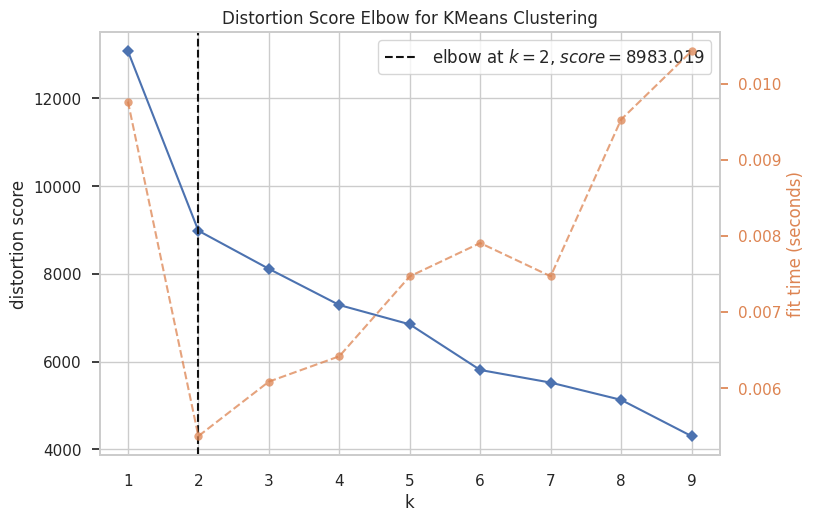

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
kmeans_elbow = KMeans()

visualizer = KElbowVisualizer(kmeans_elbow, k=(1, 10))
visualizer.fit(data_scaled)
visualizer.show()

Berdasarkan elbow method, clustering paling optimal sebanyak 2 cluster

In [90]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled)

DBSCAN()

Inisialisasi model K-Means dan DBSCAN

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [91]:
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score K-Means: {silhouette_kmeans}")
silhouette_dbscan = silhouette_score(data_scaled, dbscan.labels_)
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")

Silhouette Score K-Means: 0.31717231493273146
Silhouette Score DBSCAN: 0.31744357505199405


* Dari silhouette score, kedua model memiliki kualitas cluster yg cukup berdekatan.

* Namun score tersebut masih kurang, sehingga butuh feature selection.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [92]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Buat DataFrame dengan principal component
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-1.445138,0.525884
1,1.722562,0.363725
2,-2.046520,1.259955
3,1.795290,0.708752
4,0.709248,-0.087921


Melakukan principal componen analysis dengan mengambil 2 principal component untuk mewakili variabel lain dalam menginisialisasi model

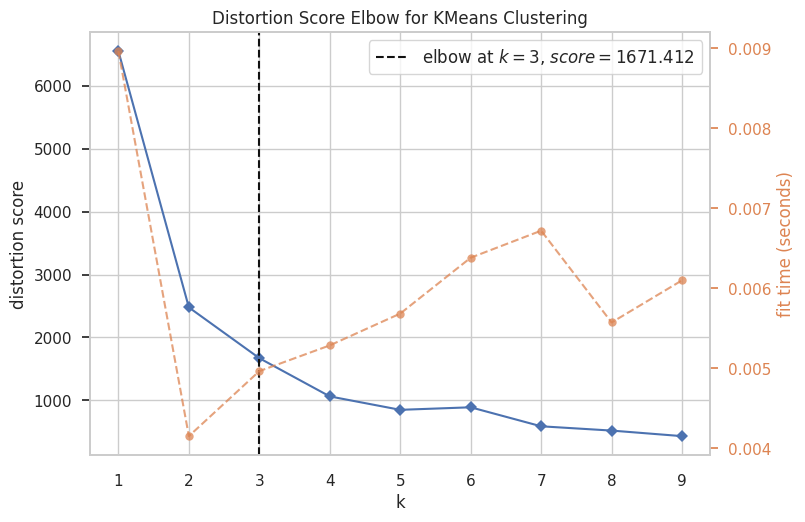

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
kmeans_elbow_pca = KMeans()

visualizer = KElbowVisualizer(kmeans_elbow_pca, k=(1, 10))
visualizer.fit(pca_df)
visualizer.show()

Cluster paling baik sebanyak 3 cluster menurut elbow method

In [94]:
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(pca_df)

dbscan_pca = DBSCAN(eps=0.8, min_samples=10)
dbscan_pca.fit(pca_df)

DBSCAN(eps=0.8, min_samples=10)

Inisialisasi ulang model K-Means dan DBSCAN setelah melakukan PCA

In [95]:
silhouette_kmeans_pca = silhouette_score(pca_df, kmeans_pca.labels_)
print(f"Silhouette Score K-Means: {silhouette_kmeans_pca}")
silhouette_dbscan_pca = silhouette_score(pca_df, dbscan_pca.labels_)
print(f"Silhouette Score DBSCAN: {silhouette_dbscan_pca}")

Silhouette Score K-Means: 0.5837729088500009
Silhouette Score DBSCAN: 0.5838531487400115


* Score silhouette kedua model menjadi lebih baik setelah melakukan PCA.
* Kualitas model dalam membedakan seberapa baik setiap data poin dikelompokkan dengan cluster yang benar dan seberapa jauh jaraknya dari cluster yang berbeda.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

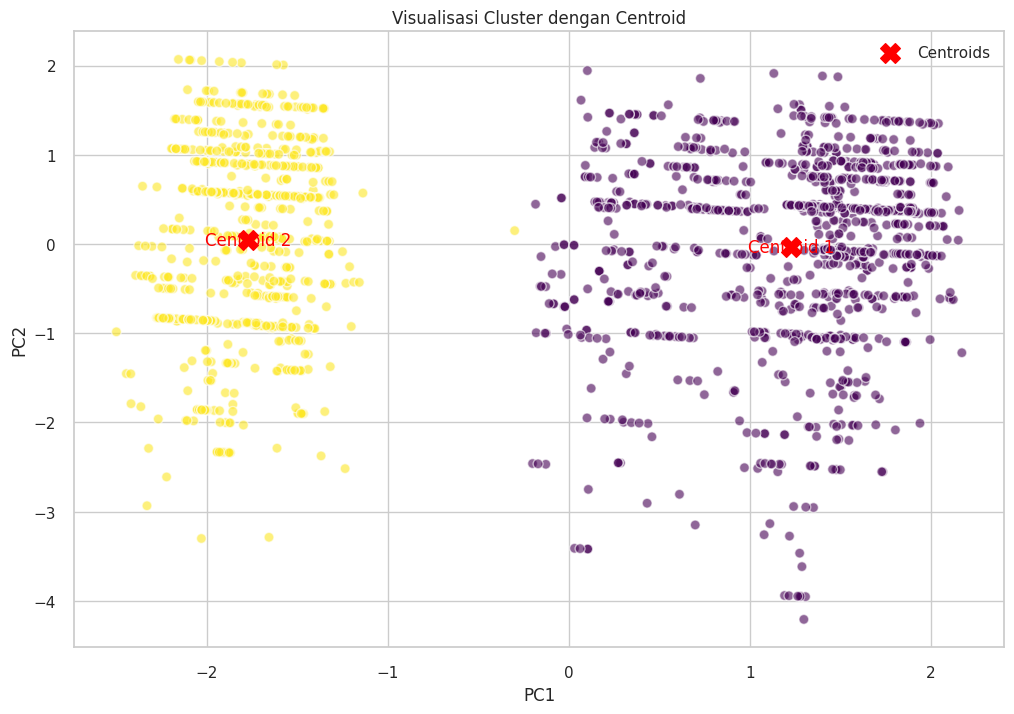

Nilai Centroids:
Centroid 1: PC1 = 1.23, PC2 = -0.03
Centroid 2: PC1 = -1.77, PC2 = 0.04


In [96]:
# Menentukan posisi centroid
centroids = kmeans_pca.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Get cluster labels
labels = kmeans_pca.labels_

# Access data using .iloc for DataFrame slicing
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: PC1 = {centroid[0]:.2f}, PC2 = {centroid[1]:.2f}")

* Hasil visualisasi dengan K-Means terlihat jelas 2 cluster yang berada di sebelah kiri dan kanan plot.

* Namun masih terlihat titik data kuning masih berdekatan masuk ke cluster berwarna ungu.



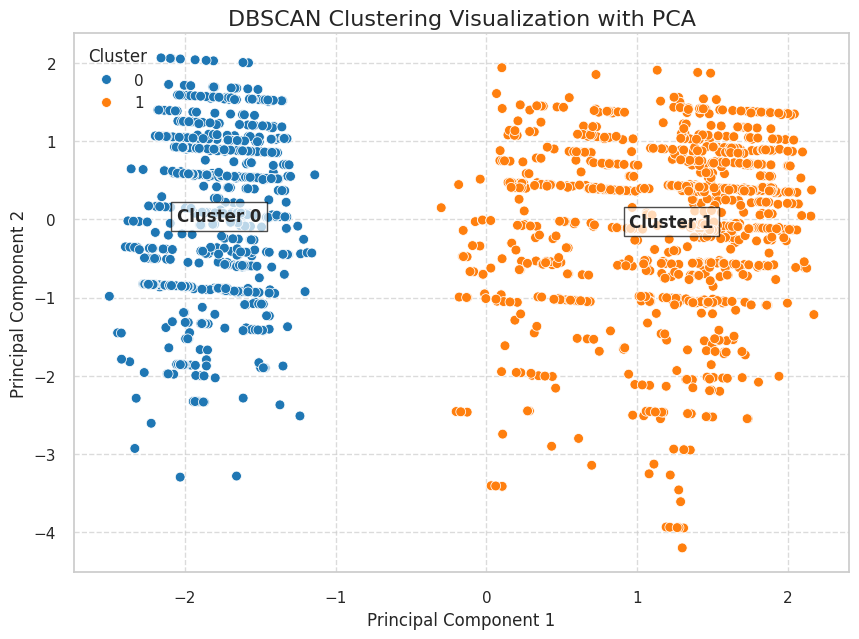

In [97]:
# Menambahkan kolom label cluster ke DataFrame hasil PCA
pca_df['Cluster'] = dbscan_pca.labels_

# Membuat scatter plot untuk visualisasi cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='tab10',
    data=pca_df,
    legend='full',
    s=50
)

# Menambahkan teks untuk setiap cluster
for cluster_label in np.unique(dbscan_pca.labels_):
    if cluster_label != -1:  # Hindari cluster noise
        cluster_points = pca_df[pca_df['Cluster'] == cluster_label]
        centroid = cluster_points[['PC1', 'PC2']].mean()
        plt.text(
            centroid['PC1'],
            centroid['PC2'],
            f'Cluster {cluster_label}',
            fontsize=12,
            fontweight='bold',
            ha='center',
            va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
        )

# Menambahkan judul dan label sumbu
plt.title('DBSCAN Clustering Visualization with PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



* Visualisasi dengan model DBSCAN masih sama seperti visualisasi K-Means.
* Namun, pada model DBSCAN terlihat lebih baik karena masing-masing internal cluster saling berdekatan dan perbedaan antar cluster sangat baik dilihat dari tidak adanya pencampuran warna pada titik data antar cluster.



## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [98]:
pca_df['cluster'] = dbscan_pca.labels_
data_awal['cluster'] = dbscan_pca.labels_
data_awal

,review_score,price,payment_type,product_category,monetary,recency,RFM_score,cluster
0,5,49.00,credit_card,watches_gifts,49.00,201,2.76,0
1,5,78.00,boleto,watches_gifts,78.00,54,4.05,1
2,1,29.00,credit_card,watches_gifts,29.00,350,1.74,0
3,4,78.00,credit_card,watches_gifts,78.00,141,3.90,1
4,5,49.00,boleto,watches_gifts,94.00,15,4.43,1
...,...,...,...,...,...,...,...,...
2313,4,95.00,boleto,watches_gifts,95.00,387,3.88,1
2314,5,159.00,credit_card,watches_gifts,159.00,414,4.15,1
2315,3,95.00,credit_card,watches_gifts,95.00,244,4.10,1
2316,5,49.00,credit_card,watches_gifts,49.00,382,2.48,0




*   Menggunakan label yang dihasilkan oleh model DBSCAN pada data.
*   Lalu menggabungkan label clustler ke data awal.



In [99]:
numerical_cols = data_awal.select_dtypes(include=np.number).columns.tolist()
cluster_data = data_awal[numerical_cols]

mean_cluster = cluster_data.groupby('cluster').mean()
mean_cluster

,review_score,price,monetary,recency,RFM_score
cluster,,,,,
0,3.960733,41.382042,41.486754,243.708115,2.369267
1,3.942935,75.638533,116.775226,205.070652,3.913886


Nilai rata-rata numerik tiap variabel integer/float pada data

In [100]:
# Group by 'cluster' and calculate mode
grouped_mode = data_awal.groupby('cluster').agg(lambda x: x.mode()[0] if not x.mode().empty else None)
categorical_columns = grouped_mode.select_dtypes(include=['object', 'category'])
categorical_columns

,payment_type,product_category
cluster,,
0,credit_card,watches_gifts
1,credit_card,watches_gifts


Nilai modus tiap variabel kategorik pada data

In [101]:
cluster_0 = data_awal[data_awal['cluster'] == 0]
cluster_1 = data_awal[data_awal['cluster'] == 1]

<ipython-input-102-5e3cefb342e8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=cluster, x="Cluster", y="Jumlah Data", palette="viridis")


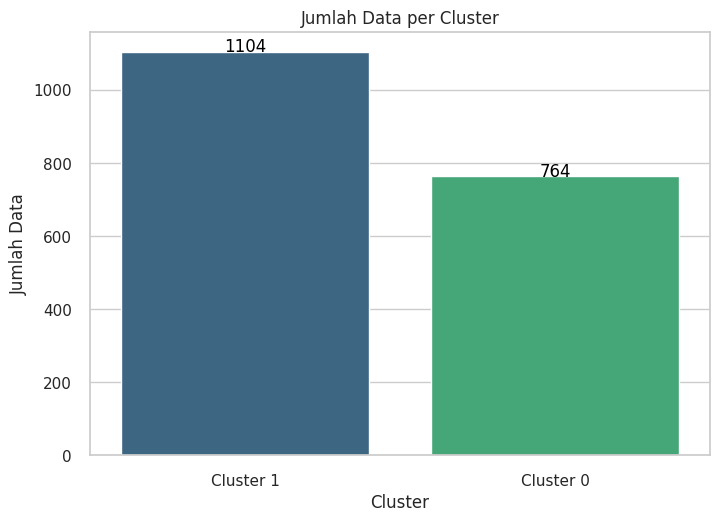

In [102]:
cluster_labels = ["Cluster 0", "Cluster 1"]
cluster_counts = [cluster_0.shape[0], cluster_1.shape[0]]

# Membuat DataFrame
cluster = pd.DataFrame({"Cluster": cluster_labels, "Jumlah Data": cluster_counts})
cluster = cluster.sort_values(by="Jumlah Data", ascending=False).reset_index(drop=True)
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data=cluster, x="Cluster", y="Jumlah Data", palette="viridis")

# Menambahkan label pada setiap batang
for index, row in cluster.iterrows():
    barplot.text(index, row["Jumlah Data"] + 0.5, str(row["Jumlah Data"]), color="black", ha="center")

plt.title("Jumlah Data per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.show()

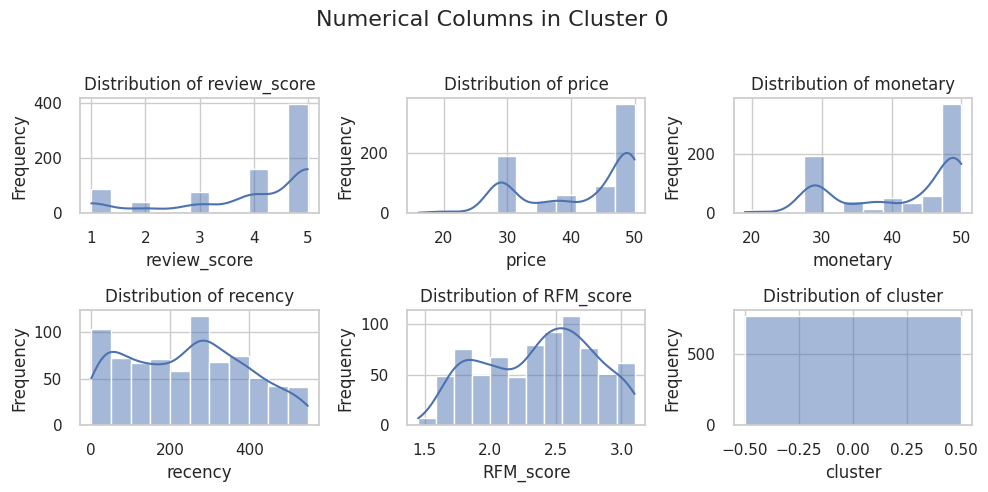

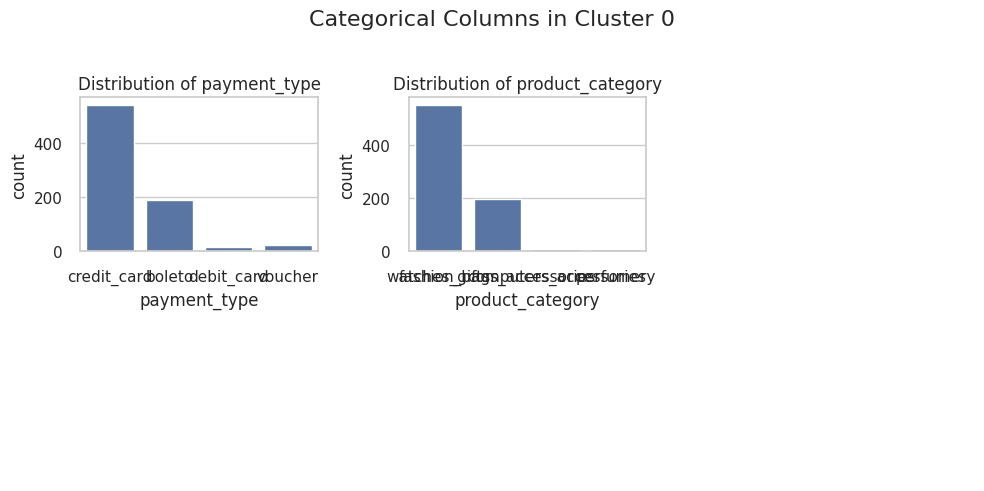

In [103]:
# Select numerical columns
numerical_cols = cluster_0.select_dtypes(include=np.number).columns.tolist()
categorical_cols = cluster_0.select_dtypes(exclude=np.number).columns.tolist()

# Fitur Numerik
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
fig.suptitle('Numerical Columns in Cluster 0', fontsize=16)

for i, col in enumerate(numerical_cols[:rows * cols]):
    row, col_idx = divmod(i, cols)
    sns.histplot(cluster_0[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

for i in range(len(numerical_cols), rows * cols):
    row, col_idx = divmod(i, cols)
    axes[row, col_idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Fitur Kategorik
fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
fig.suptitle('Categorical Columns in Cluster 0', fontsize=16)

for i, col in enumerate(categorical_cols[:rows * cols]):
    row, col_idx = divmod(i, cols)
    sns.countplot(x=col, data=cluster_0, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

for i in range(len(categorical_cols), rows * cols):
    row, col_idx = divmod(i, cols)
    axes[row, col_idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* Pada cluster 0, variabel review score, price, dan monetary terlihat distribusi nilai yang ada sangat skewed ke kiri, yang berarti sebagian besar data cenderung ada pada nilai yang tinggi.
* Begitu juga dengan distribusi pada variabel kategorik yang sangat tidak seimbang.

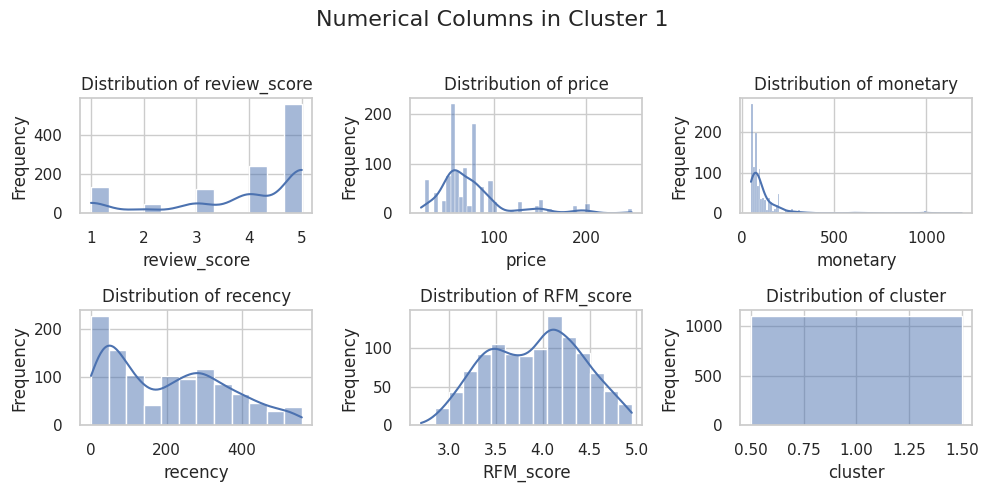

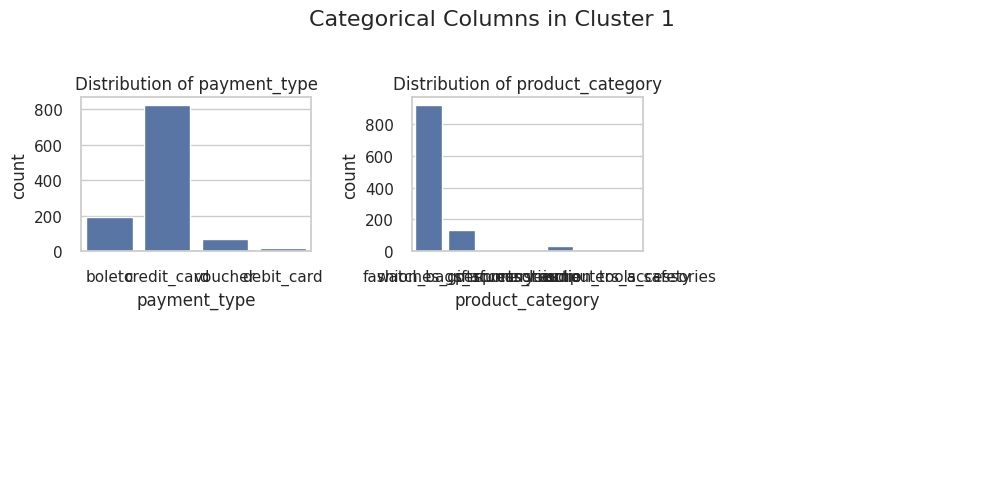

In [104]:
# Select numerical columns
numerical_cols1 = cluster_1.select_dtypes(include=np.number).columns.tolist()
categorical_cols1 = cluster_1.select_dtypes(exclude=np.number).columns.tolist()

# Fitur Numerik
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
fig.suptitle('Numerical Columns in Cluster 1', fontsize=16)

for i, col in enumerate(numerical_cols1[:rows * cols]):
    row, col_idx = divmod(i, cols)
    sns.histplot(cluster_1[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

for i in range(len(numerical_cols1), rows * cols):
    row, col_idx = divmod(i, cols)
    axes[row, col_idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Fitur Kategorik
fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
fig.suptitle('Categorical Columns in Cluster 1', fontsize=16)

for i, col in enumerate(categorical_cols1[:rows * cols]):
    row, col_idx = divmod(i, cols)
    sns.countplot(x=col, data=cluster_1, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

for i in range(len(categorical_cols1), rows * cols):
    row, col_idx = divmod(i, cols)
    axes[row, col_idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* Pada cluster 1, variabel review score berdistribusi skewed kiri yang berarti sebagian besar data cenderung ada pada nilai yang tinggi.
* Distribusi pada variabel price dan monetary justru skewed kanan yang berarti sebagian besar data cenderung ada pada nilai yang rendah.
* Begitu juga dengan distribusi pada variabel kategorik yang sangat tidak seimbang.

**Berikut merupakan analisis karakteristik untuk setiap cluster yang didapatkan dari model DBSCAN:**

**Cluster 0**
* Rata-rata price per produk: 21 USD, menunjukkan bahwa pelanggan dalam cluster ini cenderung membeli produk dengan harga relatif rendah.
* Rata-rata monetary per hari: 244 USD, menunjukkan bahwa pelanggan dalam cluster ini sering melakukan pembelian meskipun nilai transaksi per pembelian tidak terlalu besar.
* Rata-rata recency: 21 hari, menunjukkan bahwa pelanggan dalam cluster ini cukup aktif dalam jangka waktu dekat.
* RFM score: 2, yang berarti pelanggan ini memiliki loyalitas yang rendah.
* Payment Type: Mayoritas transaksi dilakukan menggunakan kartu kredit.
* Product Category: Pelanggan dalam cluster ini cenderung membeli produk dari kategori spare parts, accessories, dan other related items.

**Analisis:**
Pelanggan dalam cluster ini memiliki frekuensi pembelian yang tinggi, meskipun nilai transaksi per pembelian kecil. Mereka masih cukup aktif dalam periode waktu terbaru, yang menunjukkan bahwa mereka memiliki potensi untuk menjadi pelanggan yang lebih setia jika diberikan perhatian khusus. Pembelian dengan harga rendah dan kategori produk yang lebih fungsional (seperti spare parts dan aksesoris) menunjukkan bahwa mereka cenderung membeli produk praktis yang mendukung kebutuhan sehari-hari mereka. Dengan skor RFM yang rendah, loyalitas mereka masih dapat ditingkatkan melalui promosi dan insentif. Sebagian besar pelanggan menggunakan metode pembayaran kartu kredit, yang dapat dimanfaatkan untuk menawarkan promo atau keuntungan tambahan, seperti cashback atau cicilan 0%. Kategori produk yang lebih murah dan fungsional ini menunjukkan bahwa pelanggan lebih tertarik pada harga terjangkau dan kegunaan produk.

**Strategi Pemasaran:**
* Insentif Diskon: Memberikan kupon diskon atau potongan harga untuk meningkatkan frekuensi pembelian dan membangun loyalitas.
* Penawaran Bundle: Menawarkan paket produk dengan harga terjangkau untuk mendorong pembelian dalam jumlah lebih banyak atau lebih sering.
* Program Pengingat: Mengirimkan pengingat atau rekomendasi produk terkait untuk meningkatkan keterlibatan pelanggan.
* Promo Kartu Kredit: Tawari promo cicilan 0%, cashback, atau diskon tambahan bagi pengguna kartu kredit.
* Perluas Pilihan Produk: Menambahkan variasi produk dalam kategori spare parts dan aksesoris, serta memperkenalkan produk dengan harga yang lebih terjangkau.
* Penawaran Musiman: Manfaatkan momen tertentu seperti liburan atau acara besar untuk menawarkan promo khusus bagi pelanggan dengan frekuensi pembelian tinggi namun nilai transaksi kecil.
* Program Loyalitas: Buat program loyalitas untuk memberikan penghargaan bagi pelanggan yang sering bertransaksi meskipun dengan nilai kecil per pembelian.

**Cluster 1**
* Rata-rata price per produk: 76 USD, menunjukkan pelanggan dalam cluster ini cenderung membeli produk dengan harga yang lebih tinggi dibandingkan Cluster 0.
* Rata-rata monetary per hari: 205 USD, meskipun mereka jarang melakukan pembelian, kontribusi moneter mereka tetap signifikan.
* Rata-rata recency: 117 hari, menunjukkan bahwa pelanggan dalam cluster ini sudah cukup lama tidak melakukan transaksi.
* RFM score: 4, yang berarti pelanggan ini memiliki loyalitas yang tinggi meskipun sudah lama tidak aktif.
* Payment Type: Mayoritas transaksi dilakukan menggunakan kartu kredit.
* Product Category: Pelanggan dalam cluster ini cenderung membeli produk dari kategori watches & gifts.

**Analisis:**
Pelanggan dalam cluster ini memiliki kecenderungan untuk membeli produk dengan harga lebih tinggi, meskipun frekuensi pembelian mereka lebih rendah. Dengan kontribusi moneter yang signifikan meskipun jarang bertransaksi, mereka adalah pelanggan dengan potensi loyalitas tinggi jika reaktivasi dilakukan dengan pendekatan yang tepat. Berdasarkan skor RFM yang tinggi, meskipun mereka sudah lama tidak bertransaksi, mereka memiliki potensi besar untuk kembali berbelanja. Penggunaan kartu kredit sebagai metode pembayaran juga menunjukkan bahwa mereka lebih suka transaksi yang fleksibel dan mungkin mengharapkan keuntungan tambahan seperti cashback atau poin reward dari penggunaan kartu kredit. Kebanyakan pembelian mereka berasal dari kategori watches & gifts yang menunjukkan bahwa pelanggan ini lebih tertarik pada produk yang berharga lebih tinggi dan berfungsi sebagai hadiah atau barang bergaya. Ini memberikan peluang untuk menawarkan produk yang lebih eksklusif atau dengan personalisasi tertentu.

**Strategi Pemasaran:**
* Penawaran Eksklusif: Kirimkan diskon besar atau penawaran khusus untuk memotivasi mereka kembali bertransaksi.
* Reaktivasi dengan Program Loyalitas: Manfaatkan program loyalitas atau reward points untuk menarik mereka kembali dengan insentif berbasis poin atau hadiah.
* Komunikasi Personal: Kirimkan email atau pesan personal yang relevan dengan preferensi mereka, terutama terkait produk di kategori watches & gifts.
* Promo Kartu Kredit: Berikan tawaran eksklusif bagi pengguna kartu kredit, seperti cicilan 0%, cashback, atau diskon tambahan.
* Penambahan Variasi Produk: Perluas pilihan dalam kategori watches & gifts, termasuk produk premium atau barang dengan opsi personalisasi (misalnya, jam tangan custom atau hadiah unik).
* Promosi Musiman: Manfaatkan momen musim hadiah (misalnya, akhir tahun, Hari Valentine) untuk meluncurkan penawaran eksklusif yang menarik bagi pelanggan dengan loyalitas tinggi.
* Promosi Bulk: Dorong pembelian dalam jumlah besar dengan menawarkan diskon tambahan untuk pembelian lebih dari satu item.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [105]:
data_scaled['cluster'] = dbscan_pca.labels_
data_scaled.to_csv('data_hasil.csv', index=False)